
# ***Exploration and Cleaning of the Transactions Table***






In [1]:
import pandas as pd
# Display all columns
pd.set_option('display.max_columns', None)

# Display all rows
pd.set_option('display.max_rows', None)

In [2]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import PIL
import os
from pathlib import Path




In [3]:
#from google.colab import auth
#auth.authenticate_user()
#from google.cloud import bigquery
#from pandas_gbq import read_gbq


#project_id = "data-analytics-bootcamp-363212"

#query = '''
#SELECT *
#FROM `data-analytics-bootcamp-363212.neo_bank.transactions`
#'''

#df_transactions = read_gbq(query, project_id=project_id)

In [4]:
#os.makedirs("/content/drive/MyDrive/Documents", exist_ok=True)

#df_transactions.to_csv(
 #   "/content/drive/MyDrive/Documents/eval_transactions.csv",
  #  index=False)

#print("Saved to Google Drive Documents folder")

In [5]:
#df_transactions.to_csv("eval_transactions.csv", index=False)

#from google.colab import files
#files.download("eval_transactions.csv")

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
df_transactions = pd.read_csv(
    "eval_transactions.csv"
)

df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_505,TOPUP,AED,298.62,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_4773,2018-08-02 09:41:07.426363+00:00
1,transaction_1755379,EXCHANGE,AED,3.51,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_10435,2018-09-06 10:23:15.807148+00:00
2,transaction_1667,EXCHANGE,AED,0.05,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_397,2018-05-16 06:09:28.063037+00:00
3,transaction_1429,EXCHANGE,AED,24.14,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4399,2018-12-19 20:22:03.550130+00:00
4,transaction_345,EXCHANGE,AED,0.21,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1731,2018-10-27 13:29:56.524826+00:00


In [8]:
df_transactions["transactions_type"].value_counts()

,count
transactions_type,
TRANSFER,14201
TOPUP,11960
CARD_PAYMENT,5192
EXCHANGE,4319
CASHBACK,2478
FEE,689
ATM,247
TAX,212
REFUND,58


In [9]:
df_transactions.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39388 entries, 0 to 39387
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         39388 non-null  object 
 1   transactions_type      39387 non-null  object 
 2   transactions_currency  39387 non-null  object 
 3   amount_usd             39387 non-null  float64
 4   transactions_state     39387 non-null  object 
 5   ea_cardholderpresence  5439 non-null   object 
 6   ea_merchant_mcc        5470 non-null   float64
 7   ea_merchant_city       5470 non-null   object 
 8   ea_merchant_country    5470 non-null   object 
 9   direction              39387 non-null  object 
 10  user_id                39387 non-null  object 
 11  created_date           39387 non-null  object 
dtypes: float64(2), object(10)
memory usage: 3.6+ MB


In [10]:
df_transactions.nunique()

,0
transaction_id,39388
transactions_type,10
transactions_currency,11
amount_usd,4879
transactions_state,6
ea_cardholderpresence,3
ea_merchant_mcc,204
ea_merchant_city,1626
ea_merchant_country,85
direction,2


In [11]:
df_transactions.columns = df_transactions.columns.str.lower().str.replace(" ", "_")
text_cols = df_transactions.select_dtypes(include='object').columns

for col in text_cols:
    df_transactions[col] = (df_transactions[col].str.lower() .str.strip().str.replace(r'\s+', '_', regex=True) .str.replace(r'[^\w]', '', regex=True))

In [12]:
df_transactions["ea_merchant_city"] = (
    df_transactions["ea_merchant_city"]
    # 1) fake NaNs
    .replace(
        ["nan", "Nan", "NAN", "none", "None", "null", "NULL", "", " "],
        pd.NA
    )
    .fillna("Not Applicable")
    # 2) cleaning
    .astype(str)
    .str.lower()
    .str.replace(r'\b\d{2}-\d{3}\b', '', regex=True)
    .str.replace(r'[_\d]+', ' ', regex=True)
    .str.replace(r'^\s*-+', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
    # 3) numeric-only OR empty after cleaning → Not Applicable
    .replace(r'^\d+$', "Not Applicable", regex=True)
    .replace(r'^$', "Not Applicable", regex=True)
)


In [13]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.5 MB/s eta 0:00:00


In [14]:
import pycountry

def alpha3_to_alpha2(code):
    try:
        return pycountry.countries.get(alpha_3=code).alpha_2
    except:
        return None

df_transactions["merchant_country"] = (
    df_transactions["ea_merchant_country"]
    .apply(alpha3_to_alpha2)
)

In [15]:
df_transactions['ea_merchant_country']=df_transactions["ea_merchant_country"].str.upper()

In [16]:
df_transactions["ea_merchant_city"] = df_transactions["ea_merchant_city"].fillna("Not Applicable")
df_transactions["merchant_country"] = df_transactions["merchant_country"].fillna("Not Applicable")
df_transactions["ea_merchant_country"] = df_transactions["ea_merchant_country"].fillna("Not Applicable")
df_transactions["ea_cardholderpresence"] = df_transactions["ea_cardholderpresence"].fillna("Not Applicable")

In [17]:
df_transactions["ea_merchant_mcc"] = df_transactions["ea_merchant_mcc"].fillna(-1)

In [18]:
df_transactions[df_transactions.duplicated(keep=False)]

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country


In [19]:
df_transactions.tail(200)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country
39188,transaction_2725674,transfer,eur,3.40,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_12188,20190501_1959387796150000,Not Applicable
39189,transaction_2727403,transfer,eur,0.85,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_18557,20190505_1713291375300000,Not Applicable
39190,transaction_2729173,transfer,eur,0.03,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_12618,20190509_1308062783520000,Not Applicable
39191,transaction_2737712,transfer,eur,0.14,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_16918,20190512_0254051053660000,Not Applicable
39192,transaction_1193617,transfer,eur,0.78,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_9275,20181225_2018549464230000,Not Applicable
39193,transaction_1193709,transfer,eur,21.28,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_9739,20181225_0353050062200000,Not Applicable
39194,transaction_1199144,transfer,eur,0.43,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_3886,20190113_1912054417710000,Not Applicable
39195,transaction_1199158,transfer,eur,0.85,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_7394,20190114_2107336399430000,Not Applicable
39196,transaction_1201615,transfer,eur,0.01,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_2363,20190125_0200231217020000,Not Applicable
39197,transaction_1202112,transfer,eur,2.55,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_7684,20190123_0902312152530000,Not Applicable


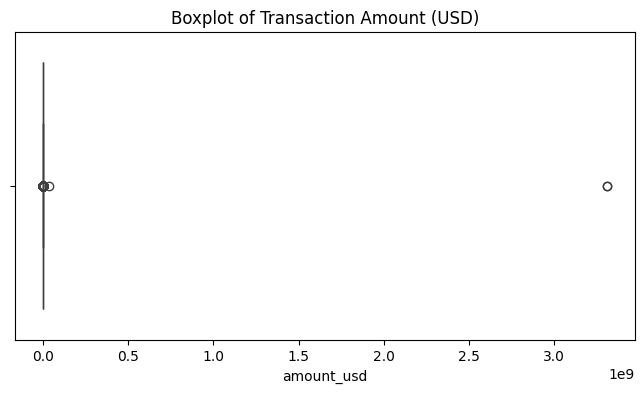

In [20]:
#CHECK FOR OUTLIERS

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df_transactions["amount_usd"])
plt.title("Boxplot of Transaction Amount (USD)")
plt.show()

In [21]:
df_transactions["amount_usd"].describe()

,amount_usd
count,3.938700e+04
mean,1.688878e+05
std,2.356609e+07
min,0.000000e+00
25%,8.500000e-01
50%,8.510000e+00
75%,4.255000e+01
max,3.307073e+09


In [22]:
#df_transactions["amount_usd"] = df_transactions["amount_usd"].clip(upper=100)

In [23]:
#df_transactions = df_transactions[df_transactions["amount_usd"] < 70]

In [24]:
#CLEANING THE OUTLIERS

#Q1 = df_transactions["amount_usd"].quantile(0.25)
#Q3 = df_transactions["amount_usd"].quantile(0.75)
#IQR = Q3 - Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#lower_bound, upper_bound

#df_transactions_clean = df_transactions[
 #   (df_transactions["amount_usd"] >= lower_bound) &
 #   (df_transactions["amount_usd"] <= upper_bound)]

 #sns.boxplot(x=df_transactions_clean["amount_usd"])
#plt.title("Transaction Amount")
#plt.show()




In [25]:

# =========================
# 1. IQR calculation
# =========================
Q1 = df_transactions["amount_usd"].quantile(0.25)
Q3 = df_transactions["amount_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_1 = Q1 - 1.5 * IQR
upper_1 = Q3 + 1.5 * IQR

lower_2 = Q1 - 3 * IQR
upper_2 = Q3 + 3 * IQR

# =========================
# 2. Create NEW dataframe
# =========================

df_transactions["outlier_level"] = "normal"

df_transactions.loc[
    (df_transactions["amount_usd"] < lower_1) | (df_transactions["amount_usd"] > upper_1),
    "outlier_level"
] = "mild"

df_transactions.loc[
    (df_transactions["amount_usd"] < lower_2) | (df_transactions["amount_usd"] > upper_2),
    "outlier_level"
] = "extreme"


In [26]:
df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country,outlier_level
0,transaction_505,topup,aed,298.62,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_4773,20180802_0941074263630000,Not Applicable,extreme
1,transaction_1755379,exchange,aed,3.51,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_10435,20180906_1023158071480000,Not Applicable,normal
2,transaction_1667,exchange,aed,0.05,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_397,20180516_0609280630370000,Not Applicable,normal
3,transaction_1429,exchange,aed,24.14,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_4399,20181219_2022035501300000,Not Applicable,normal
4,transaction_345,exchange,aed,0.21,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_1731,20181027_1329565248260000,Not Applicable,normal


In [27]:
df_transactions["outlier_level"].value_counts(normalize=True) * 100


,proportion
outlier_level,
normal,85.155377
extreme,11.902102
mild,2.942521


In [28]:
df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,merchant_country,outlier_level
0,transaction_505,topup,aed,298.62,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,inbound,user_4773,20180802_0941074263630000,Not Applicable,extreme
1,transaction_1755379,exchange,aed,3.51,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_10435,20180906_1023158071480000,Not Applicable,normal
2,transaction_1667,exchange,aed,0.05,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_397,20180516_0609280630370000,Not Applicable,normal
3,transaction_1429,exchange,aed,24.14,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_4399,20181219_2022035501300000,Not Applicable,normal
4,transaction_345,exchange,aed,0.21,completed,Not Applicable,-1.0,Not Applicable,Not Applicable,outbound,user_1731,20181027_1329565248260000,Not Applicable,normal


In [38]:
df_transactions.to_csv("df_transactions.csv",index=False,encoding="utf-8")

from google.colab import files
files.download("df_transactions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>